In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.layers import Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [80]:
train_df = pd.read_csv("../Data/UNSW_NB15_testing-set.csv")
test_df = pd.read_csv("../Data/UNSW_NB15_training-set.csv")

In [81]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [82]:
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [83]:
train_df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,175341.000000,175341.000000,175341,175341,175341,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341,175341.000000
unique,NaN,NaN,133,13,9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,INT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,79946,94168,82275,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56000,NaN
mean,87671.000000,1.359389,NaN,NaN,NaN,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,...,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,NaN,0.680622
std,50616.731112,6.480249,NaN,NaN,NaN,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,...,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,NaN,0.466237
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,43836.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,87671.000000,0.001582,NaN,NaN,NaN,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,131506.000000,0.668069,NaN,NaN,NaN,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,...,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,NaN,1.000000


In [84]:
def preprocess_numerical_cols(df):
    numerical_cols = df.select_dtypes(exclude=["object"]).columns
    df[numerical_cols] = df[numerical_cols].fillna(0)
    return df

In [85]:
def preprocess_categorical_cols(df):
    categorical_cols = df.select_dtypes(include=["object"]).columns
    df[categorical_cols] = df[categorical_cols].replace('-', "None")
    df[categorical_cols] = df[categorical_cols].fillna("None")
    return df

In [86]:
def drop_columns(df, to_drop = ['id','attack_cat']):
    df.drop(to_drop,axis=1,inplace=True)
    return df

In [87]:
def plot_labels(df):
    plt.figure(figsize=(10,5))
    sns.countplot(x='label',data=df)
    plt.show()

In [88]:
def perform_Smote_over_sampling(X,y):
    from imblearn.over_sampling import SMOTE
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X, y)
    return X_smote, y_smote

In [89]:
def standardize(df):
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    return df

In [90]:
train_df = drop_columns(train_df)
test_df = drop_columns(test_df)

In [91]:
train_df = preprocess_numerical_cols(train_df)
test_df = preprocess_numerical_cols(test_df)
train_df = preprocess_categorical_cols(train_df)
test_df = preprocess_categorical_cols(test_df)

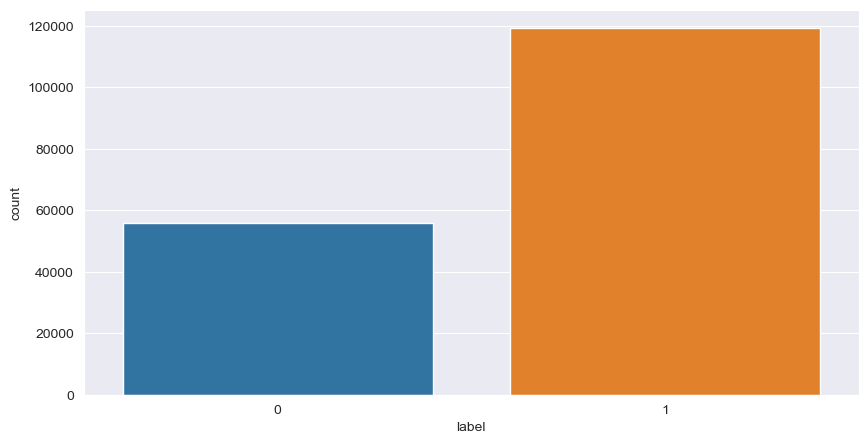

In [92]:
plot_labels(train_df)

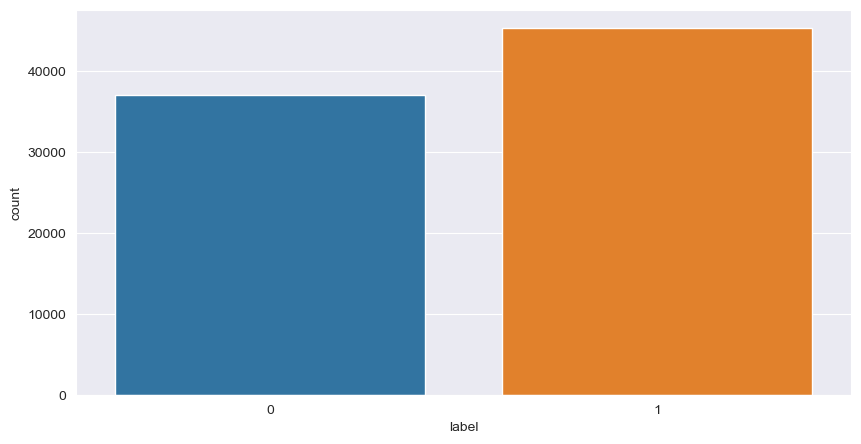

In [93]:
plot_labels(test_df)

In [94]:
target_variable = 'label'
X_train = train_df.drop(target_variable, axis=1)
y_train = train_df[target_variable]
X_test = test_df.drop(target_variable, axis=1)
y_test = test_df[target_variable]

In [95]:
# Identify the categorical columns in your dataset
categorical_columns = X_train.select_dtypes(include=['object']).columns

In [96]:
# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
X_test_encoded = encoder.transform(X_test[categorical_columns])

In [98]:
# Combine the one-hot encoded features with the numerical features
X_train_numeric = X_train.drop(categorical_columns, axis=1)
X_train_combined = np.hstack((X_train_numeric, X_train_encoded))

In [99]:
X_test_numeric = X_test.drop(categorical_columns, axis=1)
X_test_combined = np.hstack((X_test_numeric, X_test_encoded))

In [100]:
# Perform SMOTE over-sampling on the training data
X_train_resampled, y_train_resampled = perform_Smote_over_sampling(X_train_combined, y_train)

In [101]:
# number of mising values
print("Number of missing values in training set: ", np.count_nonzero(np.isnan(X_train_resampled)))

Number of missing values in training set:  0


In [102]:
# Standardize the dataset
X_train_standardized = standardize(X_train_resampled)
X_test_standardized = standardize(X_test_combined)

In [103]:
from collections import Counter
# Check the class distribution after oversampling
class_counts_resampled = Counter(y_train_resampled)
print("Class Distribution after SMOTE Oversampling:")
print(class_counts_resampled)

Class Distribution after SMOTE Oversampling:
Counter({0: 119341, 1: 119341})


In [104]:
# Shapes of training set, test set, and standardized sets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of X_train_resampled: ", X_train_resampled.shape)
print("Shape of y_train_resampled: ", y_train_resampled.shape)
print("Shape of X_train_standardized: ", X_train_standardized.shape)
print("Shape of X_test_standardized: ", X_test_standardized.shape)

Shape of X_train:  (175341, 42)
Shape of y_train:  (175341,)
Shape of X_test:  (82332, 42)
Shape of y_test:  (82332,)
Shape of X_train_resampled:  (238682, 194)
Shape of y_train_resampled:  (238682,)
Shape of X_train_standardized:  (238682, 194)
Shape of X_test_standardized:  (82332, 194)


In [39]:
def create_RNN(input_shape):
    model = Sequential()
    model.add(SimpleRNN(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(SimpleRNN(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [40]:
input_shape = (X_train_standardized.shape[1],1)
model = create_RNN(input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 194, 32)           1088      
                                                                 
 dropout_3 (Dropout)         (None, 194, 32)           0         
                                                                 
 batch_normalization_3 (Batc  (None, 194, 32)          128       
 hNormalization)                                                 
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                      

In [41]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
# Use early stopping and reduce learning rate on plateau
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(patience=5, verbose=1, restore_best_weights=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(patience=3, verbose=1, monitor='val_loss', factor=0.5, min_lr=0.00001)

In [43]:
# Train the model
history = model.fit(X_train_standardized, y_train_resampled, epochs=20,
                    batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
2984/2984 [==============================] - 120s 40ms/step - loss: 0.5457 - accuracy: 0.7176 - val_loss: 0.6724 - val_accuracy: 0.8749 - lr: 1.0000e-04
Epoch 2/20
2984/2984 [==============================] - 116s 39ms/step - loss: 0.4937 - accuracy: 0.7370 - val_loss: 0.7165 - val_accuracy: 0.2604 - lr: 1.0000e-04
Epoch 3/20
2984/2984 [==============================] - 121s 40ms/step - loss: 0.4793 - accuracy: 0.7569 - val_loss: 0.6789 - val_accuracy: 0.7455 - lr: 1.0000e-04
Epoch 4/20
2984/2984 [==============================] - 271s 91ms/step - loss: 0.4658 - accuracy: 0.7831 - val_loss: 0.6259 - val_accuracy: 0.7982 - lr: 1.0000e-04
Epoch 5/20
2984/2984 [==============================] - 124s 42ms/step - loss: 0.4618 - accuracy: 0.7885 - val_loss: 0.6136 - val_accuracy: 0.8162 - lr: 1.0000e-04
Epoch 6/20
2984/2984 [==============================] - 123s 41ms/step - loss: 0.4594 - accuracy: 0.7911 - val_loss: 0.6250 - val_accuracy: 0.8155 - lr: 1.0000e-04
Epoch 7/20
2984/

In [50]:
# Evaluate on test set for precision, recall, f1-score, and accuracy
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_standardized)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))


2573/2573 [==============================] - 15s 6ms/step
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     37000
           1       0.79      0.80      0.79     45332

    accuracy                           0.77     82332
   macro avg       0.77      0.77      0.77     82332
weighted avg       0.77      0.77      0.77     82332


In [51]:
#confusion matrix
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

2573/2573 [==============================] - 13s 5ms/step


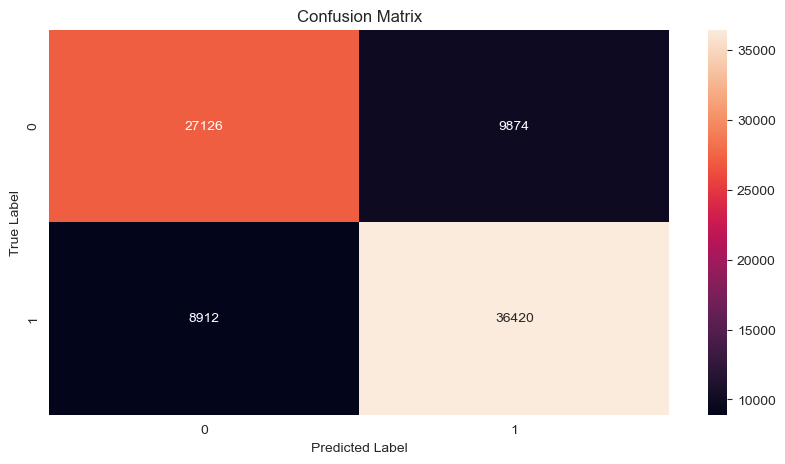

In [52]:
plot_confusion_matrix(model, X_test_standardized, y_test)

In [105]:
def visualize_training_results(history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training Results')
    plt.show()

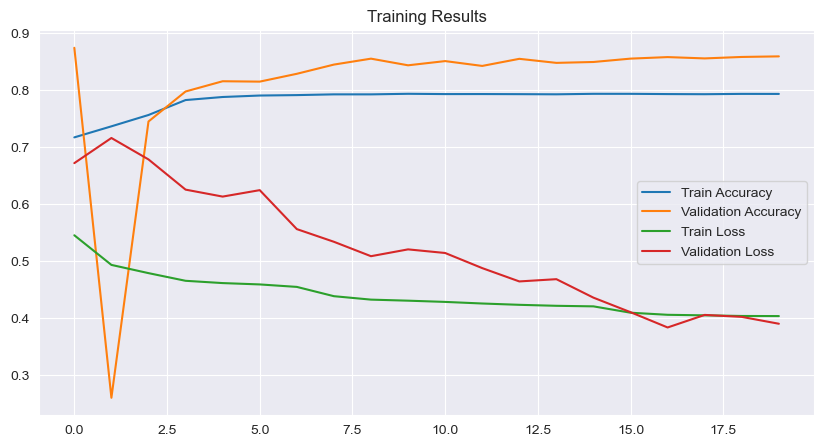

In [106]:
visualize_training_results(history)